# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
no_cities = len(cities)
no_cities

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Set url for API
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Set parameters for query url
unit = 'imperial'
api_key = weather_api_key

# Create empty list to hold the data
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_spd = []
country = []
date = []

# At the beginning, data retrieved equals 0
record = 0

# Print beginning log statement
print(f'Beginning Data Retrieval')     
print('-----------------------------')
    
# Apply for loop  to retrive the data
for city in cities:
    
    # Create search query, make request and store in json
    query_url = base_url + 'q=' + city + '&appid=' + api_key + '&units=' + unit
    response_data = requests.get(query_url).json()
    
    # Try to grab the data if they are available in the OpenWeather API
    try:
        
        # Get data form JSON 
        name = response_data['name']
        city_name.append(name)
        lat = response_data['coord']['lat']
        latitude.append(lat)
        lon = response_data['coord']['lon']
        longitude.append(lon)
        mtemp = response_data['main']['temp_max']
        max_temp.append(mtemp)
        hmd = response_data['main']['humidity']
        humidity.append(hmd)
        clouds = response_data['clouds']['all']
        cloudiness.append(clouds)
        windsp = response_data['wind']['speed']
        wind_spd.append(windsp)
        cnt = response_data['sys']['country']
        country.append(cnt)
        d = response_data['dt']
        date.append(d)
        
        # Plus 1 for the successful data retrived      
        record += 1
        
        # Print log statement for successful data retrived
        print(f'Processing Record {record} of {no_cities} | {city}')
    
    # Handle exceptions if the data is not available
    except:
        # Print log statement for unavailable data retrived
        print(f'City not found | {city}')
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
        
# Print ending log statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 617 | torbay
Processing Record 2 of 617 | ushuaia
Processing Record 3 of 617 | coihueco
Processing Record 4 of 617 | jamestown
Processing Record 5 of 617 | warmbad
Processing Record 6 of 617 | maldonado
Processing Record 7 of 617 | kavieng
City not found | attawapiskat
Processing Record 8 of 617 | busselton
City not found | taolanaro
Processing Record 9 of 617 | bambous virieux
Processing Record 10 of 617 | samfya
City not found | tsihombe
Processing Record 11 of 617 | nikolskoye
Processing Record 12 of 617 | airai
Processing Record 13 of 617 | sondrio
Processing Record 14 of 617 | chenzhou
Processing Record 15 of 617 | fort nelson
Processing Record 16 of 617 | copala
Processing Record 17 of 617 | mataura
Processing Record 18 of 617 | grand gaube
Processing Record 19 of 617 | freeport
Processing Record 20 of 617 | qaanaaq
Processing Record 21 of 617 | vila
Processing Record 22 of 617 | cacheu
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
response_data_df = pd.DataFrame({
    'City' : city_name,
    'Latitude' : latitude,
    'Longitude' : longitude,
    'Max Temp' : max_temp,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_spd,
    'Country' : country,
    'Date' : date
})

response_data_df.head()

In [ ]:
# Get basic statistical details
response_data_df.describe()

## Inspect the data and remove the cities where the humidity > 100%.

In [ ]:
# Get the indices of cities that have humidity over 100%.
humidity_over_hundred = response_data_df[response_data_df.loc[response_data_df['Humidity'] > 100]]
no_cities_humd = humidity_over_hundred['City'].count()

In [ ]:
# Create if statement for city that has humidity over 100%
if no_cities_humd == 0:
    # No. of city = 0, copy df from original df
    weather_data = response_data_df.copy()
    print(f'There are no cities that have humidity over 100%')
else:
    # If there is at least 1 city that humidity over 100%, assign to a new df by df.drop() to get a cleaned df
    weather_data = response_data_df.drop[humidity_over_hundred.index, inplace:False]

In [ ]:
weather_data_csv = weather_data.to_csv(output_data_file, index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
# Read the csv file
weather_data_df = pd.read_csv(output_data_file)

# Get the date of data retrived
time = time.localtime(weather_data_df['Date'][0])
date = f'{time.tm_year}-{time.tm_mon}-{time.tm_mday}'

In [ ]:
# Create scatter plot between Latitude and Max Temperature
lat_temp = plt.scatter(weather_data_df['Latitude'], 
                       weather_data_df['Max Temp'], 
                       marker='o', 
                       color='steelblue', 
                       edgecolor='black')

# Add title&labels and modify plot&layout
plt.title(f'City Latitude vs. Temperature (F) \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Max Temperature (F)', fontweight='bold')
plt.grid()
plt.tight_layout()

# Save figure and show the the plot
plt.savefig('Images/lat_temp.png')
plt.show()

## Latitude vs. Humidity Plot

In [ ]:
# Create scatter plot between Latitude and Humidity
lat_humd = plt.scatter(weather_data_df['Latitude'], 
                       weather_data_df['Humidity'], 
                       marker='o', 
                       color='steelblue', 
                       edgecolor='black')

# Add title&labels and modify plot&layout
plt.title(f'City Latitude vs. Humidity \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Humidity (%)', fontweight='bold')
plt.grid()
plt.tight_layout()

# Save figure and show the the plot
plt.savefig('Images/lat_humd.png')
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
# Create scatter plot between Latitude and Cloundiness
lat_cld = plt.scatter(weather_data_df['Latitude'], 
                       weather_data_df['Cloudiness'], 
                       marker='o', 
                       color='steelblue', 
                       edgecolor='black')

# Add title&labels and modify plot&layout
plt.title(f'City Latitude vs. Cloudiness \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Cloudiness (%)', fontweight='bold')
plt.grid()
plt.tight_layout()

# Save figure and show the the plot
plt.savefig('Images/lat_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

In [ ]:
# Create scatter plot between Latitude and Wind Speed
lat_wind = plt.scatter(weather_data_df['Latitude'], 
                       weather_data_df['Wind Speed'], 
                       marker='o', 
                       color='steelblue', 
                       edgecolor='black')

# Add title&labels and modify plot&layout
plt.title(f'City Latitude vs. Wind Speed \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Wind Speed (mph)', fontweight='bold')
plt.grid()
plt.tight_layout()

# Save figure and show the the plot
plt.savefig('Images/lat_wind.png')
plt.show()

## Linear Regression

In [ ]:
# Generate dataframe only for cities in Northern Hemisphere
north_df = weather_data_df.loc[weather_data_df['Latitude'] >= 0]

# Generate dataframe only for cities in Northern Hemisphere
south_df = weather_data_df.loc[weather_data_df['Latitude'] < 0]

# Linear Regression: Focus on city latitude in Northern and Southern Hemisphere
# Define x_values for latitude in Northern and Southern Hemisphere
north_lat = north_df['Latitude'] # North
south_lat = south_df['Latitude'] # South

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Northern Temp(F) and Latitude is -0.85
The r-squared is: 0.72621


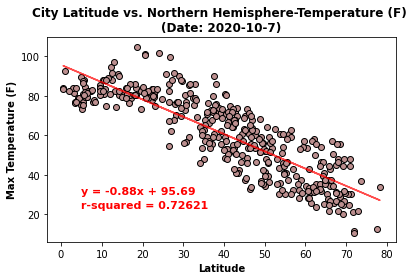

In [15]:
# Define y values: Max Temperature (F)
north_temp = north_df['Max Temp']

# Calculate the correlation
nt_correlation = round(st.pearsonr(north_lat, north_temp)[0],2)
print(f"The correlation between Northern Temp(F) and Latitude is {nt_correlation}")

# Calculate linear regression values
(nt_slope, nt_intercept, nt_rvalue, nt_pvalue, nt_stderr) = st.linregress(north_lat, north_temp)

# Calculate r-squared
nt_r_squared = round(nt_rvalue**2,5)
print(f"The r-squared is: {nt_r_squared}")

# y = mx + b
nt_regress_values = north_lat * nt_slope + nt_intercept
nt_line_eq = "y = " + str(round(nt_slope,2)) + "x + " + str(round(nt_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(north_lat,
            north_temp, 
            marker='o', 
            color='rosybrown', 
            edgecolor='black')

plt.plot(north_lat,nt_regress_values, color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(nt_line_eq,(5,30), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {nt_r_squared}', (5,23), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'City Latitude vs. Northern Hemisphere-Temperature (F) \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Max Temperature (F)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig('Images/north_temp_lat.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Southern Temp(F) and Latitude is 0.73
The r-squared is: 0.53142


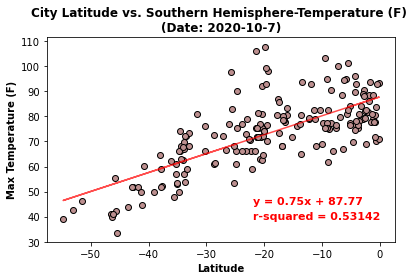

In [16]:
# Define y values: Max Temperature (F)
south_temp = south_df['Max Temp']

# Calculate the correlation
st_correlation = round(st.pearsonr(south_lat, south_temp)[0],2)
print(f"The correlation between Southern Temp(F) and Latitude is {st_correlation}")

# Calculate linear regression values
(st_slope, st_intercept, st_rvalue, st_pvalue, st_stderr) = st.linregress(south_lat, south_temp)

# Calculate r-squared
st_r_squared = round(st_rvalue**2,5)
print(f"The r-squared is: {st_r_squared}")

# y = mx + b
st_regress_values = south_lat * st_slope + st_intercept
st_line_eq = "y = " + str(round(st_slope,2)) + "x + " + str(round(st_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(south_lat,
            south_temp, 
            marker='o', 
            color='rosybrown', 
            edgecolor='black')

plt.plot(south_lat,st_regress_values, color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(st_line_eq,(-22,45), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {st_r_squared}', (-22,39), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'City Latitude vs. Southern Hemisphere-Temperature (F) \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Max Temperature (F)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig('Images/south_temp_lat.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Northern Humudity and Latitude is 0.26
The r-squared is: 0.72621


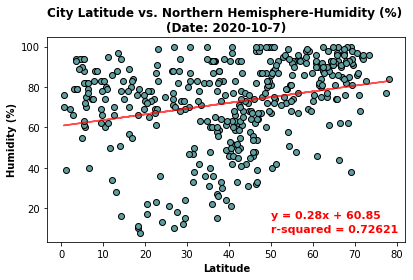

In [17]:
# Define y values: Humidity (%)
north_humd = north_df['Humidity'] # y_values

# Calculate the correlation
nh_correlation = round(st.pearsonr(north_lat, north_humd)[0],2)
print(f"The correlation between Northern Humudity and Latitude is {nh_correlation}")

# Calculate linear regression values
(nh_slope, nh_intercept, nh_rvalue, nh_pvalue, nh_stderr) = st.linregress(north_lat, north_humd)

# Calculate r-squared
nh_r_squared = round(nt_rvalue**2,5)
print(f"The r-squared is: {nh_r_squared}")

# y = mx + b
nh_regress_values = north_lat * nh_slope + nh_intercept
nh_line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(north_lat,
            north_humd, 
            marker='o', 
            color='cadetblue', 
            edgecolor='black')

plt.plot(north_lat,nh_regress_values, color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(nh_line_eq,(50,15), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {nh_r_squared}', (50,8), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'City Latitude vs. Northern Hemisphere-Humidity (%) \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Humidity (%)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig('Images/north_humd_lat.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Southern Humidity and Latitude is -0.03
The r-squared is: 0.53142


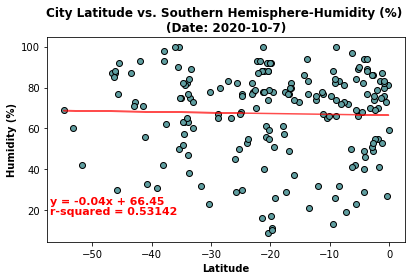

In [23]:
# Define y values: Humidity (%)
south_humd = south_df['Humidity'] # y_values

# Calculate the correlation
sh_correlation = round(st.pearsonr(south_lat, south_humd)[0],2)
print(f"The correlation between Southern Humidity and Latitude is {sh_correlation}")

# Calculate linear regression values
(sh_slope, sh_intercept, sh_rvalue, sh_pvalue, sh_stderr) = st.linregress(south_lat, south_humd)

# Calculate r-squared
sh_r_squared = round(st_rvalue**2,5)
print(f"The r-squared is: {sh_r_squared}")

# y = mx + b
sh_regress_values = south_lat * sh_slope + sh_intercept
sh_line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(south_lat,
            south_humd, 
            marker='o', 
            color='cadetblue', 
            edgecolor='black')

plt.plot(south_lat,sh_regress_values, color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(sh_line_eq,(-57,23), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {sh_r_squared}', (-57,18), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'City Latitude vs. Southern Hemisphere-Humidity (%) \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Humidity (%)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig('Images/south_humd_lat.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Northern Cloudiness and Latitude is 0.11
The r-squared is: 0.01166


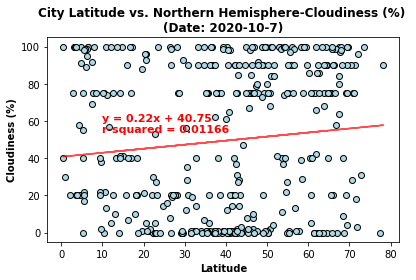

In [19]:
# Define y values: Cloudiness (%)
north_cloud = north_df['Cloudiness']

# Calculate the correlation
nc_correlation = round(st.pearsonr(north_lat, north_cloud)[0],2)
print(f"The correlation between Northern Cloudiness and Latitude is {nc_correlation}")

# Calculate linear regression values
(nc_slope, nc_intercept, nc_rvalue, nc_pvalue, nc_stderr) = st.linregress(north_lat, north_cloud)

# Calculate r-squared
nc_r_squared = round(nc_rvalue**2,5)
print(f"The r-squared is: {nc_r_squared}")

# y = mx + b
nc_regress_values = north_lat * nc_slope + nc_intercept
nc_line_eq = "y = " + str(round(nc_slope,2)) + "x + " + str(round(nc_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(north_lat,
            north_cloud, 
            marker='o', 
            color='lightblue', 
            edgecolor='black')

plt.plot(north_lat,nc_regress_values, color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(nc_line_eq,(10,60), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {nc_r_squared}', (10,54), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'City Latitude vs. Northern Hemisphere-Cloudiness (%) \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Cloudiness (%)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig('Images/north_cloud_lat.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Southern Cloudiness and Latitude is 0.04
The r-squared is: 0.0019


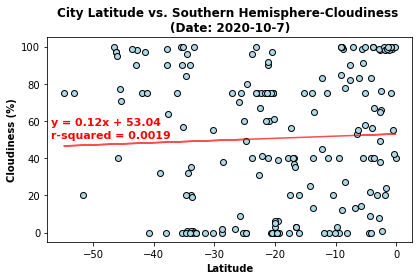

In [24]:
# Define y values: Cloudiness (%)
south_cloud = south_df['Cloudiness']

# Calculate the correlation
sc_correlation = round(st.pearsonr(south_lat, south_cloud)[0],2)
print(f"The correlation between Southern Cloudiness and Latitude is {sc_correlation}")

# Calculate linear regression values
(sc_slope, sc_intercept, sc_rvalue, sc_pvalue, sc_stderr) = st.linregress(south_lat, south_cloud)

# Calculate r-squared
sc_r_squared = round(sc_rvalue**2,5)
print(f"The r-squared is: {sc_r_squared}")

# y = mx + b
sc_regress_values = south_lat * sc_slope + sc_intercept
sc_line_eq = "y = " + str(round(sc_slope,2)) + "x + " + str(round(sc_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(south_lat,
            south_cloud, 
            marker='o', 
            color='lightblue', 
            edgecolor='black')

plt.plot(south_lat,sc_regress_values, color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(sc_line_eq,(-57,58), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {sc_r_squared}', (-57,51), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'City Latitude vs. Southern Hemisphere-Cloudiness \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Cloudiness (%)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig('Images/south_cloud_lat.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Northern Wind Speed and Latitude is 0.14
The r-squared is: 0.01892


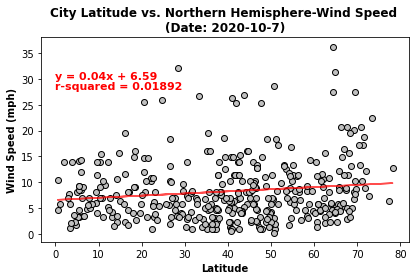

In [27]:
# Define y values: Wind Speed (mph)
north_wind = north_df['Wind Speed']

# Calculate the correlation
nw_correlation = round(st.pearsonr(north_lat, north_wind)[0],2)
print(f"The correlation between Northern Wind Speed and Latitude is {nw_correlation}")

# Calculate linear regression values
(nw_slope, nw_intercept, nw_rvalue, nw_pvalue, nw_stderr) = st.linregress(north_lat, north_wind)

# Calculate r-squared
nw_r_squared = round(nw_rvalue**2,5)
print(f"The r-squared is: {nw_r_squared}")

# y = mx + b
nw_regress_values = north_lat * nw_slope + nw_intercept
nw_line_eq = "y = " + str(round(nw_slope,2)) + "x + " + str(round(nw_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(north_lat,
            north_wind, 
            marker='o', 
            color='silver', 
            edgecolor='black')

plt.plot(north_lat,nw_regress_values, color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(nw_line_eq,(0,30), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {nw_r_squared}', (0,28), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'City Latitude vs. Northern Hemisphere-Wind Speed \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Wind Speed (mph)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig('Images/north_wind_lat.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Southern Wind Speed and Latitude is -0.13
The r-squared is: 0.01755


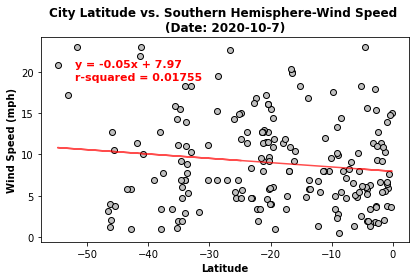

In [37]:
# Define y values: Wind Speed (mph)
south_wind = south_df['Wind Speed']

# Calculate the correlation
sw_correlation = round(st.pearsonr(south_lat, south_wind)[0],2)
print(f"The correlation between Southern Wind Speed and Latitude is {sw_correlation}")

# Calculate linear regression values
(sw_slope, sw_intercept, sw_rvalue, sw_pvalue, sw_stderr) = st.linregress(south_lat, south_wind)

# Calculate r-squared
sw_r_squared = round(sw_rvalue**2,5)
print(f"The r-squared is: {sw_r_squared}")

# y = mx + b
sw_regress_values = south_lat * sw_slope + sw_intercept
sw_line_eq = "y = " + str(round(sw_slope,2)) + "x + " + str(round(sw_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(south_lat,
            south_wind, 
            marker='o', 
            color='silver', 
            edgecolor='black')

plt.plot(south_lat,sw_regress_values, color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(sw_line_eq,(-52,20.5), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {sw_r_squared}', (-52,19), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'City Latitude vs. Southern Hemisphere-Wind Speed \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Wind Speed (mph)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig('Images/south_wind_lat.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()